<a href="https://colab.research.google.com/github/AlexanderSutherland/CS7643_Project/blob/main/Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM Stock Price Prediction Project

**Add Necessary Imports**

In [16]:
'''
Add Necessary Imports:
'''
# Pytorch (Deep Learning Model Libraries)
import torch
import torch.nn as nn
import torch.optim as optim

# Datetime class used for indexing dates
import datetime as dt


# Local Libraries
from plotter import plot_price_predictions, plot_daily_change_predictions
from train_model import train_model, test_model
from lstm import LSTM
from data_util import DataUtil

**Set Device (CUDA or CPU)**

In [17]:
# Check device availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("You are using device: %s" % device)

You are using device: cuda


Common Initial Settings:

In [18]:
# Common Initial Settings like date and look back
start_date=dt.datetime(2014, 1, 1)
end_date=dt.datetime(2016, 12, 31)
look_back=7

**Predict Price based on SMH ETF Closing Price**

Epoch 1/200, Loss: 0.12986445260283194
Test Loss: 0.6751205533742904
Epoch 2/200, Loss: 0.068391195253322
Test Loss: 0.8568380653858185
Epoch 3/200, Loss: 0.06342430157881034
Test Loss: 0.8461617410182953
Epoch 4/200, Loss: 0.06375104306559813
Test Loss: 0.8735372722148895
Epoch 5/200, Loss: 0.05887282757382644
Test Loss: 0.6153528980910778
Epoch 6/200, Loss: 0.016378953280907712
Test Loss: 0.45734990388154984
Epoch 7/200, Loss: 0.0040862618847505045
Test Loss: 0.37474234560504555
Epoch 8/200, Loss: 0.0029752550977527313
Test Loss: 0.40086132679134606
Epoch 9/200, Loss: 0.0038482766279852704
Test Loss: 0.39761761799454687
Epoch 10/200, Loss: 0.002912151902963064
Test Loss: 0.3675843784585595
Epoch 11/200, Loss: 0.0026705082824551745
Test Loss: 0.3884841576218605
Epoch 12/200, Loss: 0.002528833556234052
Test Loss: 0.3729371136054397
Epoch 13/200, Loss: 0.002467672594847452
Test Loss: 0.34875892335548997
Epoch 14/200, Loss: 0.0027982623340856087
Test Loss: 0.3650131801143289
Epoch 15/200

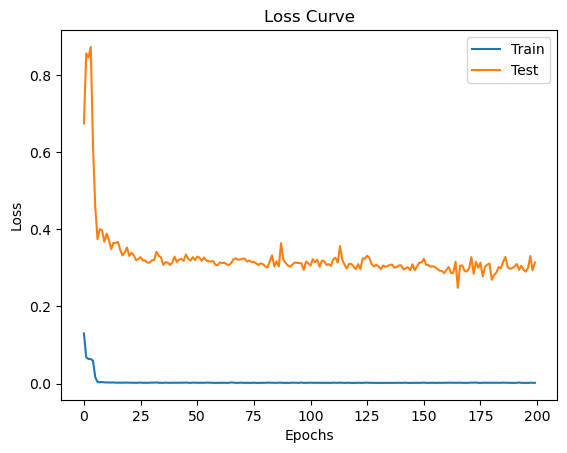

Test Loss: 0.31409953385591505


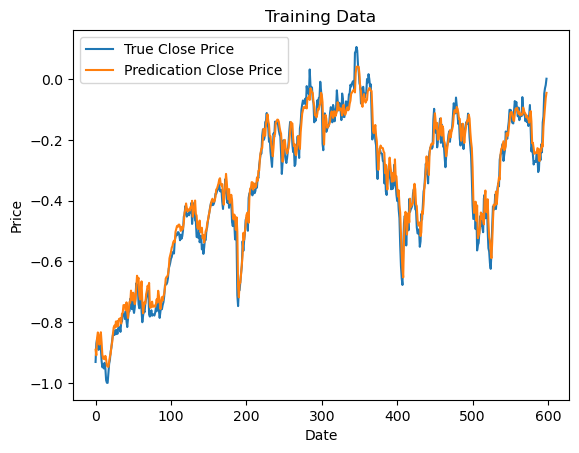

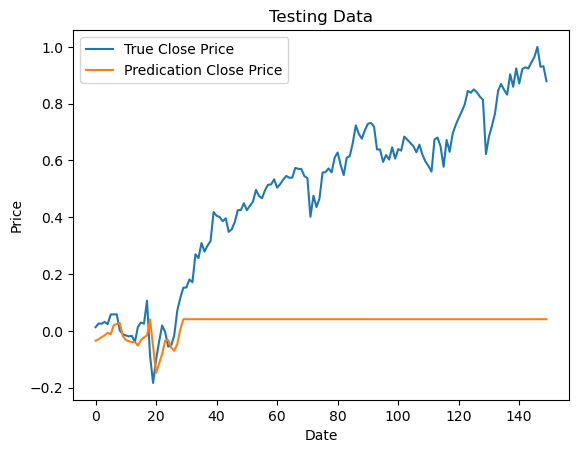

In [19]:

def main_close_price(device='cpu', 
                     start_date=dt.datetime(2014, 1, 1), 
                     end_date=dt.datetime(2015, 12, 31), 
                     look_back=7,
                     num_layers = 4):
    """
    Main function to train and test a model for predicting close prices.

    Args:
        device (str, optional): The device to run the model on. Default is 'cpu'.
        start_date (datetime, optional): The start date for data. Default is January 1, 2014.
        end_date (datetime, optional): The end date for data. Default is December 31, 2015.
        look_back (int, optional): The number of previous days to consider for the model. Default is 7.

    Returns:
        None
    """
    
    # Hyperparameters
    batch_size = 32
    learning_rate = 0.01
    criterion = nn.MSELoss()
    optimizer_type = optim.Adam
    epochs = 200
    
        
    # Split ratio for Train and Test
    split_ratio = 0.8
    
    # Generate the data sets for training and testing (Called loaders)
    data_util = DataUtil(start_date,end_date)
    data_info = data_util.generate_data_loaders_close_price(batch_size=batch_size,
                                                                split_ratio=split_ratio,
                                                                look_back=7,
                                                                device=device)
    train_loader, test_loader, x_train, y_train, x_test, y_test = data_info
    
    # Create LSTM model
    model = LSTM(1, look_back, num_layers = num_layers).to(device)

    
    # Train the model
    model = train_model(train_loader,
                        test_loader,
                        model=model,
                        criterion=criterion,
                        optimizer_type=optimizer_type,
                        epochs=epochs,
                        learning_rate=learning_rate,
                        load_model=None,
                        device=device)
    
    # Test model
    test_model(test_loader, model, criterion, device) 
    
    # Plot Price Predictions:
    model = model.to('cpu')
    pred_train = model(x_train).detach().numpy()
    pred_test = model(x_test).detach().numpy()
    plot_price_predictions(pred_train,y_train,pred_test,y_test)
    
    # # Save model updates
    # save_model = input('Would you like to save the model? Type "YES" to confirm: ')
    # if save_model.upper() == 'YES':
    #     torch.save(model.state_dict(), 'model_closing_price.pth')
    

main_close_price(device=device, start_date=start_date, end_date=end_date, look_back=look_back)

**Predict Price based on SMH ETF Daily Return**

Epoch 1/200, Loss: 0.0017765063587974414
Test Loss: 0.00047942191595211624
Epoch 2/200, Loss: 0.00024078744555529403
Test Loss: 0.00017216789274243638
Epoch 3/200, Loss: 0.00017391077065105108
Test Loss: 0.00016549788269912825
Epoch 4/200, Loss: 0.00017132638765217148
Test Loss: 0.00016715164383640513
Epoch 5/200, Loss: 0.00017464369279638814
Test Loss: 0.00016546453261980786
Epoch 6/200, Loss: 0.0001728412424103896
Test Loss: 0.00016846945800352842
Epoch 7/200, Loss: 0.00017325541863867424
Test Loss: 0.00017397428455296905
Epoch 8/200, Loss: 0.00017216707553751278
Test Loss: 0.0001651553640840575
Epoch 9/200, Loss: 0.00017078352845457725
Test Loss: 0.00016711618518456818
Epoch 10/200, Loss: 0.00018127067137117448
Test Loss: 0.00023871150915510952
Epoch 11/200, Loss: 0.0001931584012804945
Test Loss: 0.00019517703622113914
Epoch 12/200, Loss: 0.00018570065041881447
Test Loss: 0.00016617897636024282
Epoch 13/200, Loss: 0.000179995382112745
Test Loss: 0.00017611865187063813
Epoch 14/200, 

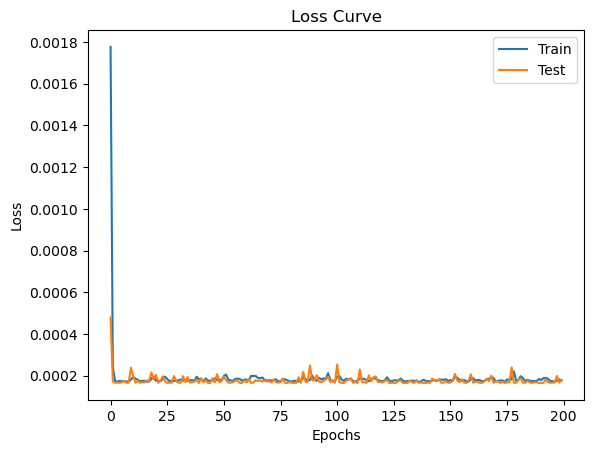

Test Loss: 0.0001802997663617134


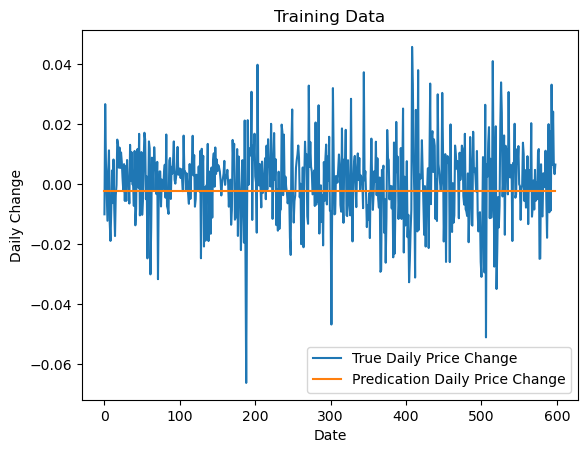

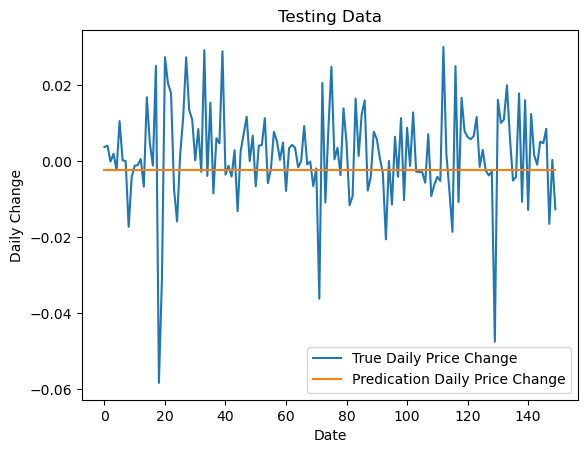

In [20]:

def main_daily_return(device = 'cpu', 
                     start_date = dt.datetime(2014, 1, 1), 
                     end_date = dt.datetime(2015, 12, 31), 
                     look_back = 7,
                     num_layers = 4):
    """
    Main function to train and test a model for predicting daily return.

    Args:
        device (str, optional): The device to run the model on. Default is 'cpu'.
        start_date (datetime, optional): The start date for data. Default is January 1, 2014.
        end_date (datetime, optional): The end date for data. Default is December 31, 2015.
        look_back (int, optional): The number of previous days to consider for the model. Default is 7.

    Returns:
        None
    """
    
    # Hyperparameters
    batch_size = 32
    learning_rate = 0.01
    criterion = nn.MSELoss()
    optimizer_type = optim.Adam
    epochs = 200
    
        
    # Split ratio for Train and Test
    split_ratio = 0.8
    
    # Generate the data sets for training and testing (Called loaders)
    data_util = DataUtil(start_date,end_date)
    data_info = data_util.generate_data_loaders_daily_returns(batch_size=batch_size,
                                                            split_ratio=split_ratio,
                                                            look_back=7,
                                                            device=device)
    train_loader, test_loader, x_train, y_train, x_test, y_test = data_info
    
    # Create LSTM model
    model = LSTM(1, look_back, num_layers).to(device)

    
    # Train the model
    model = train_model(train_loader,
                        test_loader,
                        model=model,
                        criterion=criterion,
                        optimizer_type=optimizer_type,
                        epochs=epochs,
                        learning_rate=learning_rate,
                        load_model=None,
                        device=device)
    
    # Test model
    test_model(test_loader, model, criterion, device) 
    
    # Plot Price Predictions:
    model = model.to('cpu')
    pred_train = model(x_train).detach().numpy()
    pred_test = model(x_test).detach().numpy()
    plot_daily_change_predictions(pred_train,y_train,pred_test,y_test, save=False)
    
    # # Save model updates
    # save_model = input('Would you like to save the model? Type "YES" to confirm: ')
    # if save_model.upper() == 'YES':
    #     torch.save(model.state_dict(), 'model_daily_returns.pth')
    

main_daily_return(device=device, start_date=start_date, end_date=end_date, look_back=look_back)